In [1]:
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn
# pip install tensorflow
# !pip install scikeras
# !pip install shap

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import shap

# DataSet
#### https://www.kaggle.com/datasets/shashwatwork/injury-prediction-for-competitive-runners

In [5]:
df = pd.read_csv("C:\\Users\\MKmos\\Downloads\\tmp\\day_approach_maskedID_timeseries.csv")

In [3]:
df

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.00,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2143
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2286
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.00,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2483
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.00,0.87,0.86,0.20,...,0.0,0.0,0.0,0.0,0.79,0.80,0.11,71,1,2647


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

In [5]:
df.describe()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,...,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,...,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,...,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,...,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.170000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,...,48.000000,40.000000,2.000000,20.000000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


In [6]:
df.isna().sum()

nr. sessions                   0
total km                       0
km Z3-4                        0
km Z5-T1-T2                    0
km sprinting                   0
                              ..
perceived trainingSuccess.6    0
perceived recovery.6           0
Athlete ID                     0
injury                         0
Date                           0
Length: 73, dtype: int64

In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

0

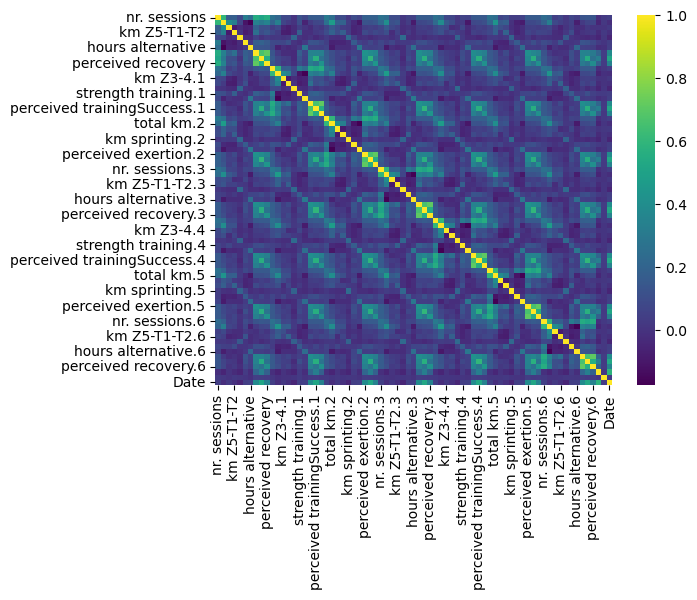

In [9]:
sns.heatmap(data=df.corr(), cmap='viridis');

# Feature Engineering

In [10]:
df.columns

Index(['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting',
       'strength training', 'hours alternative', 'perceived exertion',
       'perceived trainingSuccess', 'perceived recovery', 'nr. sessions.1',
       'total km.1', 'km Z3-4.1', 'km Z5-T1-T2.1', 'km sprinting.1',
       'strength training.1', 'hours alternative.1', 'perceived exertion.1',
       'perceived trainingSuccess.1', 'perceived recovery.1', 'nr. sessions.2',
       'total km.2', 'km Z3-4.2', 'km Z5-T1-T2.2', 'km sprinting.2',
       'strength training.2', 'hours alternative.2', 'perceived exertion.2',
       'perceived trainingSuccess.2', 'perceived recovery.2', 'nr. sessions.3',
       'total km.3', 'km Z3-4.3', 'km Z5-T1-T2.3', 'km sprinting.3',
       'strength training.3', 'hours alternative.3', 'perceived exertion.3',
       'perceived trainingSuccess.3', 'perceived recovery.3', 'nr. sessions.4',
       'total km.4', 'km Z3-4.4', 'km Z5-T1-T2.4', 'km sprinting.4',
       'strength training.4',

In [11]:
df = df.drop(['Athlete ID', 'Date'], axis=1)

In [12]:
df['injury'].value_counts()

injury
0    42183
1      583
Name: count, dtype: int64

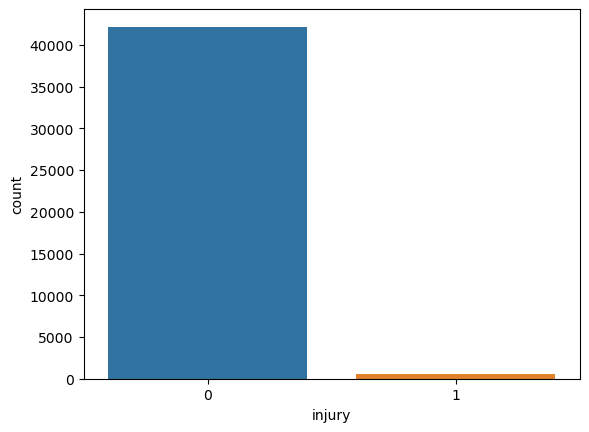

In [13]:
sns.countplot(data=df, x='injury');

In [14]:
df_new = pd.concat([df[df['injury'] == 0][:2000], df[df['injury'] == 1]])

In [15]:
df_new['injury'].value_counts()

injury
0    2000
1     583
Name: count, dtype: int64

In [16]:
X = df_new.drop('injury', axis=1)
y = df_new['injury']

In [17]:
# Spliting the data into 90% for TRAINING & 10% for TESTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [18]:
y_train.value_counts()

injury
0    1798
1     526
Name: count, dtype: int64

In [19]:
y_test.value_counts()

injury
0    202
1     57
Name: count, dtype: int64

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),

#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=8),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),

#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=16),
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),

    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,817 (14.91 KB)

 Trainable params: 3,625 (14.16 KB)

 Non-trainable params: 192 (768.00 B)

In [24]:
save_best_weights = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_weights.weights.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True
)

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir='logs/weights_biases', histogram_freq=1)
# histogram_freq=1: Specifies that histograms of weights and biases should be logged after each epoch.

In [2]:
# C:\Users\MKmos\Downloads\tmp
# tensorboard --logdir logs/weights_biases

^C


In [70]:
history = model.fit(X_train, y_train, batch_size=16, epochs=200, verbose=1, 
                    callbacks=[save_best_weights, tensorboard_cb], validation_split=0.1)

Epoch 1/200
118/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.5375
Epoch 1: val_loss improved from inf to 0.49888, saving model to best_weights.weights.h5
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7789 - loss: 0.5348 - val_accuracy: 0.8026 - val_loss: 0.4989
Epoch 2/200
127/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8277 - loss: 0.4299
Epoch 2: val_loss improved from 0.49888 to 0.37235, saving model to best_weights.weights.h5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8277 - loss: 0.4295 - val_accuracy: 0.8498 - val_loss: 0.3723
Epoch 3/200
117/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.4022
Epoch 3: val_loss improved from 0.37235 to 0.33768, saving model to best_weights.weights.h5
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8436 - loss: 0.4021 - val_accuracy: 0.8670 - val_loss: 0.3377
Epoch 4/200
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8674 - loss: 0.3482
Epoch 4: val_loss improved fr

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9366 - loss: 0.1965 - val_accuracy: 0.8970 - val_loss: 0.3458
Epoch 26/200
123/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9307 - loss: 0.2069
Epoch 26: val_loss did not improve from 0.29731
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9309 - loss: 0.2067 - val_accuracy: 0.8884 - val_loss: 0.3469
Epoch 27/200
116/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9397 - loss: 0.1899
Epoch 27: val_loss did not improve from 0.29731
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9395 - loss: 0.1916 - val_accuracy: 0.8970 - val_loss: 0.3282
Epoch 28/200
118/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9444 - loss: 0.2049
Epoch 28: val_loss did not improve from 0.29731
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9442 - loss: 0.2047 - val_accuracy: 0.8884 - val_loss: 0.3507
Epoch 29/200
125/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1629
Epoch 29: val_loss did not improve f

Epoch 51/200
117/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1445
Epoch 51: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9637 - loss: 0.1444 - val_accuracy: 0.9227 - val_loss: 0.3388
Epoch 52/200
117/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9663 - loss: 0.1388
Epoch 52: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9662 - loss: 0.1385 - val_accuracy: 0.9099 - val_loss: 0.3430
Epoch 53/200
121/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9636 - loss: 0.1187
Epoch 53: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9634 - loss: 0.1198 - val_accuracy: 0.9056 - val_loss: 0.3808
Epoch 54/200
121/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9605 - loss: 0.1356
Epoch 54: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9603 - loss: 0.1363 - val_accuracy: 0.9056 - val_l

131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9772 - loss: 0.0930 - val_accuracy: 0.8970 - val_loss: 0.3581
Epoch 77/200
120/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.0976
Epoch 77: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9716 - loss: 0.0980 - val_accuracy: 0.8841 - val_loss: 0.3800
Epoch 78/200
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.1071
Epoch 78: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.1071 - val_accuracy: 0.9013 - val_loss: 0.3862
Epoch 79/200
106/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.1397
Epoch 79: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9659 - loss: 0.1382 - val_accuracy: 0.9013 - val_loss: 0.3552
Epoch 80/200
113/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.0868
Epoch 80: val_loss did not improve f

123/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9779 - loss: 0.0680
Epoch 102: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9775 - loss: 0.0698 - val_accuracy: 0.8927 - val_loss: 0.4113
Epoch 103/200
109/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9770 - loss: 0.0900
Epoch 103: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9775 - loss: 0.0887 - val_accuracy: 0.8970 - val_loss: 0.4290
Epoch 104/200
122/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.1131
Epoch 104: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.1120 - val_accuracy: 0.8927 - val_loss: 0.4116
Epoch 105/200
109/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.0674
Epoch 105: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9828 - loss: 0.0701 - val_accuracy: 0.8927 - val_loss: 0

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.0942 - val_accuracy: 0.8884 - val_loss: 0.4272
Epoch 128/200
123/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0708
Epoch 128: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0718 - val_accuracy: 0.8927 - val_loss: 0.3911
Epoch 129/200
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0756
Epoch 129: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9773 - loss: 0.0756 - val_accuracy: 0.8970 - val_loss: 0.4063
Epoch 130/200
120/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.0788
Epoch 130: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9784 - loss: 0.0791 - val_accuracy: 0.9056 - val_loss: 0.4174
Epoch 131/200
120/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0733
Epoch 131: val_loss did not i

Epoch 153/200
117/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0883
Epoch 153: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9823 - loss: 0.0868 - val_accuracy: 0.8884 - val_loss: 0.4174
Epoch 154/200
122/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9875 - loss: 0.0545
Epoch 154: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0555 - val_accuracy: 0.8798 - val_loss: 0.4183
Epoch 155/200
121/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9792 - loss: 0.0822
Epoch 155: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9794 - loss: 0.0822 - val_accuracy: 0.8884 - val_loss: 0.4162
Epoch 156/200
121/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0717
Epoch 156: val_loss did not improve from 0.29316
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0711 - val_accuracy: 0.8884

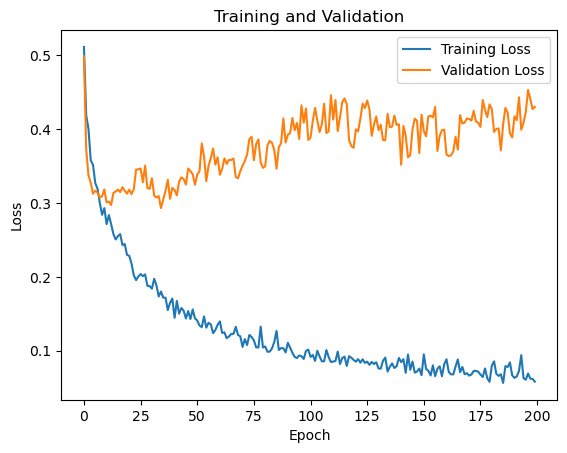

In [97]:
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation');

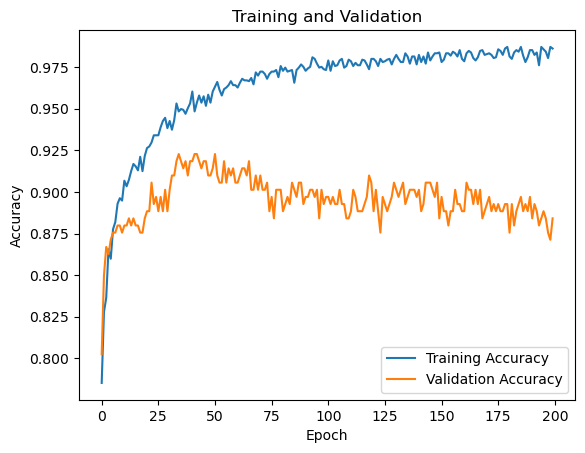

In [98]:
plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation');

In [25]:
# Loading the best model's weights
model.load_weights(filepath='best_weights.weights.h5')

In [141]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9338 - loss: 0.1992 


[0.18748240172863007, 0.9382239580154419]

In [27]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [28]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       202
           1       0.92      0.79      0.85        57

    accuracy                           0.94       259
   macro avg       0.93      0.88      0.91       259
weighted avg       0.94      0.94      0.94       259



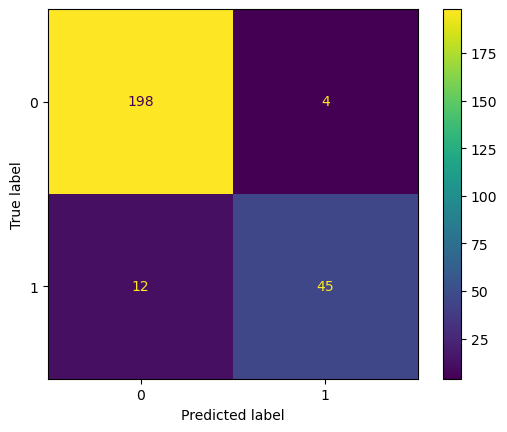

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

# Hyperparameter Tuning

In [143]:
def build_model(n_hidden=1, n_neurons=32, learning_rate=1e-3, add_dropout=False, add_batchnormalization=False):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))    
    
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(units=n_neurons, activation='relu'))
        if add_dropout:
            model.add(tf.keras.layers.Dropout(0.2))
        if add_batchnormalization:
            model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model

In [151]:
keras_clf = KerasClassifier(build_model)

In [152]:
keras_clf.fit(X_train, y_train, epochs=20)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7005 - loss: 0.6129 
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8659 - loss: 0.3362
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9028 - loss: 0.2800
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9104 - loss: 0.2443
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9229 - loss: 0.2216
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9241 - loss: 0.2161
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9368 - loss: 0.1916
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9290 - loss: 0.1945
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9387 - loss: 0.1853
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9269 - loss: 0.1945
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9400 - loss: 0.1740
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy

KerasClassifier(
	model=<function build_model at 0x000002422069D940>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [153]:
keras_clf.score(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.9227799227799228

In [216]:
# build_model(n_hidden=1, n_neurons=32, learning_rate=1e-3, add_dropout=False, add_batchnormalization=False)

param_grid = {
    'model__n_hidden': [2, 3, 4],
    'model__n_neurons': [8, 16, 32],
    'model__learning_rate': [1e-3, 1e-2],
    'model__add_dropout': [True, False],
    'model__add_batchnormalization': [True, False]
}

In [217]:
3 * 3 * 3 * 2 * 2 * 5    # 5 K-fold cv

540

In [218]:
3 * 3 * 5

45

In [219]:
keras_cls = KerasClassifier(build_model)
grid_search = GridSearchCV(keras_cls, param_grid, cv=5, verbose=2)

In [220]:
grid_search.fit(X_train, y_train, epochs=20)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5664 - loss: 0.8048
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6797 - loss: 0.6266
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7351 - loss: 0.5673
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.5096
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7898 - loss: 0.4833
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.4255
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8266 - loss: 0.4259
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8274 - loss: 0.4224
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8521 - loss: 0.3801
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8481 - loss: 0.3822
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8471 - loss: 0.3633
Epoch 12/20


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8554 - loss: 0.3704
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8528 - loss: 0.3605
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8747 - loss: 0.3304
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8786 - loss: 0.3388
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8747 - loss: 0.3218
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8698 - loss: 0.3467
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8764 - loss: 0.3119
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8847 - loss: 0.2954
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8824 - loss: 0.3006
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9016 - loss: 0.2534
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8765 - loss: 0.3167
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8911 - loss: 0.

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8929 - loss: 0.2755
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9130 - loss: 0.2350
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9175 - loss: 0.2347
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8972 - loss: 0.2589
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9225 - loss: 0.2287
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9268 - loss: 0.2022
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9027 - loss: 0.2510
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9158 - loss: 0.2316
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9175 - loss: 0.2237
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=True, model__learning_rate=0.001, model__n_hidden=2, model__n_neurons=32; total time=   4.4s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step -

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.3705
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3353
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3697
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=True, model__learning_rate=0.001, model__n_hidden=3, model__n_neurons=8; total time=   5.6s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5389 - loss: 0.7751
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6365 - loss: 0.6579
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 0.6127
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7512 - loss: 0.5791
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.5340
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7609 - loss: 0.5117
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.5726
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8117 - loss: 0.4575
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 0.4008
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8449 - loss: 0.3723
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3414
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.3731
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3415
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.3035
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3175
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3343
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8844 - loss: 0.3188
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 0.2929

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4916
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4718
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8136 - loss: 0.4608
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4707
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8075 - loss: 0.4663
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.4467
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4438
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.4323
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8225 - loss: 0.4089
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8392 - loss: 0.4033
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.3891
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8298 - loss: 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8884 - loss: 0.3012
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.3556
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8962 - loss: 0.2910
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.3282
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.3298
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8924 - loss: 0.2877
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8863 - loss: 0.2933
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=True, model__learning_rate=0.001, model__n_hidden=4, model__n_neurons=16; total time=   6.4s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5378 - loss: 0.7585
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 0.6715
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.3170
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=True, model__learning_rate=0.001, model__n_hidden=4, model__n_neurons=32; total time=   6.3s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5830 - loss: 0.7664
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7231 - loss: 0.5760
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7806 - loss: 0.5003
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.4605
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.4488
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.4065
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8456 - loss: 0.3883
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.3407
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9131 - loss: 0.2369
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8968 - loss: 0.2485
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9076 - loss: 0.2492
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9071 - loss: 0.2498
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9071 - loss: 0.2497
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9082 - loss: 0.2437
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9221 - loss: 0.2255
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9165 - loss: 0.2188
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9082 - loss: 0.2284
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9174 - loss: 0.2224
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9267 - loss: 0.2121
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9171 - loss: 0.21

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9435 - loss: 0.1564
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1799
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9420 - loss: 0.1568
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9392 - loss: 0.1522
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9343 - loss: 0.1652
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9557 - loss: 0.1448
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9418 - loss: 0.1711
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9467 - loss: 0.1424
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9485 - loss: 0.1444
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9465 - loss: 0.1616
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9437 - loss: 0.1512
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[CV] END model__add_batchnormalization

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9106 - loss: 0.2614
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9194 - loss: 0.2254
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9008 - loss: 0.2534
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9225 - loss: 0.2309
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9102 - loss: 0.2427
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=True, model__learning_rate=0.01, model__n_hidden=3, model__n_neurons=8; total time=   5.3s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6830 - loss: 0.6016
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.3584
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3689
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8825 - loss: 0.3002
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7138 - loss: 0.5943
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3601
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3350
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3069
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8870 - loss: 0.2901
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.2931
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9041 - loss: 0.2544
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9005 - loss: 0.2550
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9090 - loss: 0.2534
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8996 - loss: 0.2542
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9175 - loss: 0.2429
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8958 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.3063
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3203
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8883 - loss: 0.2971
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.2927
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3548
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3192
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8805 - loss: 0.3093
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8957 - loss: 0.2916
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9048 - loss: 0.2582
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8816 - loss: 0.3081
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8894 - loss: 0.2903
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8862 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9121 - loss: 0.2450
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9237 - loss: 0.2206
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.2286
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9227 - loss: 0.2181
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9316 - loss: 0.2136
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.1846
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9122 - loss: 0.2438
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9205 - loss: 0.2058
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=True, model__learning_rate=0.01, model__n_hidden=4, model__n_neurons=16; total time=   6.5s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6918 - loss: 0.6155
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9312 - loss: 0.1957
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9338 - loss: 0.1796
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=True, model__learning_rate=0.01, model__n_hidden=4, model__n_neurons=32; total time=   6.6s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6932 - loss: 0.5946
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3551
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8798 - loss: 0.3108
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8934 - loss: 0.2751
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 0.2798
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8970 - loss: 0.2602
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9065 - loss: 0.2419
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5658 - loss: 0.7330
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6565 - loss: 0.5951
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7743 - loss: 0.5080
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8017 - loss: 0.4651
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.4035
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8722 - loss: 0.3567
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.3280
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8839 - loss: 0.3155
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9030 - loss: 0.2806
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9085 - loss: 0.2792
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9170 - loss: 0.2346
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9186 - loss: 0.2445


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9171 - loss: 0.2445
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9160 - loss: 0.2252
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9163 - loss: 0.2179
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9199 - loss: 0.2091
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9283 - loss: 0.2072
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9251 - loss: 0.2046
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9252 - loss: 0.2048
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9288 - loss: 0.1992
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9282 - loss: 0.1900
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9359 - loss: 0.1736
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9315 - loss: 0.1762
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9317 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9318 - loss: 0.1824
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9452 - loss: 0.1712
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9479 - loss: 0.1519
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9461 - loss: 0.1486
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9524 - loss: 0.1410
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9618 - loss: 0.1096
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9530 - loss: 0.1367
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9704 - loss: 0.1108
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=False, model__learning_rate=0.001, model__n_hidden=2, model__n_neurons=32; total time=   4.1s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5726 - loss: 0.7647
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9260 - loss: 0.2073
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9066 - loss: 0.2329
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=False, model__learning_rate=0.001, model__n_hidden=3, model__n_neurons=8; total time=   4.9s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6153 - loss: 0.7408
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4923
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8417 - loss: 0.4034
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3621
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8712 - loss: 0.3349
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3536
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8966 - loss: 0.2696
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5282 - loss: 0.7754
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7409 - loss: 0.5189
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8276 - loss: 0.4374
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3681
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8882 - loss: 0.3103
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.2962
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9024 - loss: 0.2836
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9082 - loss: 0.2645
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9077 - loss: 0.2494
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8982 - loss: 0.2652
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9058 - loss: 0.2381
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9129 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9225 - loss: 0.2211
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9309 - loss: 0.1881
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9342 - loss: 0.1832
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9460 - loss: 0.1540
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9430 - loss: 0.1802
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9520 - loss: 0.1542
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9438 - loss: 0.1420
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.1192
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.1235
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.1465
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1211
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.2331
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9218 - loss: 0.2207
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9177 - loss: 0.2327
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9096 - loss: 0.2243
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9147 - loss: 0.2297
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9147 - loss: 0.2017
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9122 - loss: 0.2091
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9123 - loss: 0.2038
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=False, model__learning_rate=0.001, model__n_hidden=4, model__n_neurons=16; total time=   5.8s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4657 - loss: 0.8896
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9603 - loss: 0.1157
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.1097
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=False, model__learning_rate=0.001, model__n_hidden=4, model__n_neurons=32; total time=   5.9s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6100 - loss: 0.7460
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.4594
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.3423
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.3096
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.2606
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2470
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9110 - loss: 0.2362
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7674 - loss: 0.5134
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9069 - loss: 0.2579
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9182 - loss: 0.2287
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9251 - loss: 0.2026
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9232 - loss: 0.2013
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9204 - loss: 0.2228
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9225 - loss: 0.2252
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9317 - loss: 0.1756
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9290 - loss: 0.1808
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9201 - loss: 0.2062
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9310 - loss: 0.2039
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9347 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9392 - loss: 0.1688
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9475 - loss: 0.1442
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9563 - loss: 0.1300
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9565 - loss: 0.1255
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9537 - loss: 0.1170
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9540 - loss: 0.1351
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9569 - loss: 0.1201
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9727 - loss: 0.0850
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9683 - loss: 0.0893
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9590 - loss: 0.0939
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9638 - loss: 0.1140
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9616 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9785 - loss: 0.0813
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9780 - loss: 0.0763
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9731 - loss: 0.0992
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.0715
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9700 - loss: 0.0884
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9826 - loss: 0.0651
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9830 - loss: 0.0600
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9784 - loss: 0.0765
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=False, model__learning_rate=0.01, model__n_hidden=2, model__n_neurons=32; total time=   4.1s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7804 - loss: 0.4765
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9562 - loss: 0.1453
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9637 - loss: 0.1151
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=False, model__learning_rate=0.01, model__n_hidden=3, model__n_neurons=8; total time=   4.9s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7798 - loss: 0.5225
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8771 - loss: 0.2850
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8887 - loss: 0.2640
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8971 - loss: 0.2583
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9134 - loss: 0.2345
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9168 - loss: 0.2170
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.1995
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7337 - loss: 0.5435
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 0.2585
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9191 - loss: 0.2175
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9200 - loss: 0.2057
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9370 - loss: 0.1734
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1597
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9393 - loss: 0.1760
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9483 - loss: 0.1501
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9542 - loss: 0.1271
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9428 - loss: 0.1587
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9509 - loss: 0.1436
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9436 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9433 - loss: 0.1687
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9478 - loss: 0.1435
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1257
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9442 - loss: 0.1488
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9500 - loss: 0.1379
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1287
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9635 - loss: 0.0903
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9722 - loss: 0.0956
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.0934
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9740 - loss: 0.0794
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9638 - loss: 0.1054
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.1913
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.1624
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9311 - loss: 0.1879
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9312 - loss: 0.1731
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9303 - loss: 0.1781
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9462 - loss: 0.1591
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9360 - loss: 0.1568
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9422 - loss: 0.1636
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=False, model__learning_rate=0.01, model__n_hidden=4, model__n_neurons=8; total time=   5.9s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7464 - loss: 0.5404
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9594 - loss: 0.1112
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.0763
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[CV] END model__add_batchnormalization=True, model__add_dropout=False, model__learning_rate=0.01, model__n_hidden=4, model__n_neurons=32; total time=   6.0s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7260 - loss: 0.5441
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8939 - loss: 0.2746
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8963 - loss: 0.2570
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9305 - loss: 0.1937
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9116 - loss: 0.2287
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.1816
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.1502
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7651 - loss: 0.5036
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8756 - loss: 0.3018
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9214 - loss: 0.2281
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.2054
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9267 - loss: 0.1864
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.1745
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 - loss: 0.1856
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.1692
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.1491
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9613 - loss: 0.1244
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9485 - loss: 0.1462
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9584 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8739 - loss: 0.3429
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8820 - loss: 0.3099
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8789 - loss: 0.2950
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8976 - loss: 0.2546
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8754 - loss: 0.2938
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9021 - loss: 0.2642
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9105 - loss: 0.2418
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8982 - loss: 0.2620
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9179 - loss: 0.2489
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9079 - loss: 0.2401
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9279 - loss: 0.2035
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9093 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9274 - loss: 0.1955
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9517 - loss: 0.1516
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1762
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9480 - loss: 0.1659
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9442 - loss: 0.1623
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9405 - loss: 0.1656
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9458 - loss: 0.1604
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9501 - loss: 0.1365
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END model__add_batchnormalization=False, model__add_dropout=True, model__learning_rate=0.001, model__n_hidden=2, model__n_neurons=32; total time=   3.3s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6738 - loss: 0.6273
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9028 - loss: 0.2603
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8967 - loss: 0.2666
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=True, model__learning_rate=0.001, model__n_hidden=3, model__n_neurons=8; total time=   3.6s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6835 - loss: 0.6518
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7770 - loss: 0.5867
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7820 - loss: 0.5405
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8072 - loss: 0.4653
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8146 - loss: 0.4428
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8251 - loss: 0.4220
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8305 - loss: 0.4247
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7298 - loss: 0.5962
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7884 - loss: 0.4777
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7907 - loss: 0.4610
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8263 - loss: 0.4131
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8447 - loss: 0.3732
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8528 - loss: 0.3637
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8771 - loss: 0.3056
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8788 - loss: 0.3167
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8957 - loss: 0.2941
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8999 - loss: 0.2746
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9027 - loss: 0.2726
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9061 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9086 - loss: 0.2475
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9153 - loss: 0.2323
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9114 - loss: 0.2410
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9266 - loss: 0.2314
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9164 - loss: 0.2285
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9303 - loss: 0.2020
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9327 - loss: 0.1990
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9195 - loss: 0.2196
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9233 - loss: 0.2102
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9327 - loss: 0.1850
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9376 - loss: 0.1813
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9426 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.3851
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7863 - loss: 0.3777
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7947 - loss: 0.3650
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8244 - loss: 0.3549
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8289 - loss: 0.3631
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8297 - loss: 0.3456
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 0.3355
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3458
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=True, model__learning_rate=0.001, model__n_hidden=4, model__n_neurons=8; total time=   4.1s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6668 - loss: 0.6435
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9200 - loss: 0.2576
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9205 - loss: 0.2198
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=True, model__learning_rate=0.001, model__n_hidden=4, model__n_neurons=16; total time=   4.1s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4482 - loss: 0.7444
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7941 - loss: 0.5020
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8482 - loss: 0.3775
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8718 - loss: 0.3394
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.3080
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8977 - loss: 0.2836
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9084 - loss: 0.2530
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5628 - loss: 0.6964
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7769 - loss: 0.4864
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8202 - loss: 0.4070
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8494 - loss: 0.3657
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8706 - loss: 0.3424
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8948 - loss: 0.3053
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8886 - loss: 0.3071
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8990 - loss: 0.2771
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9014 - loss: 0.2738
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9111 - loss: 0.2608
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9151 - loss: 0.2393
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9144 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9229 - loss: 0.2307
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9137 - loss: 0.2222
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9191 - loss: 0.2328
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9151 - loss: 0.2216
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9056 - loss: 0.2328
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9403 - loss: 0.1874
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9281 - loss: 0.2213
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9298 - loss: 0.2010
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9159 - loss: 0.2445
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9283 - loss: 0.2014
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9251 - loss: 0.2143
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9299 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9577 - loss: 0.1145
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9483 - loss: 0.1476
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9559 - loss: 0.1206
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9567 - loss: 0.1193
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9553 - loss: 0.1158
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9607 - loss: 0.1160
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9615 - loss: 0.1065
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9610 - loss: 0.1239
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END model__add_batchnormalization=False, model__add_dropout=True, model__learning_rate=0.01, model__n_hidden=2, model__n_neurons=32; total time=   3.4s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7836 - loss: 0.4581
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9339 - loss: 0.1855
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9348 - loss: 0.1697
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=True, model__learning_rate=0.01, model__n_hidden=3, model__n_neurons=8; total time=   3.7s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5950 - loss: 0.6872
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3813
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8843 - loss: 0.3343
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9015 - loss: 0.2868
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9152 - loss: 0.2712
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9175 - loss: 0.2579
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8978 - loss: 0.2636
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7417 - loss: 0.5179
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8668 - loss: 0.3248
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.2714
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9176 - loss: 0.2304
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9177 - loss: 0.2320
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9136 - loss: 0.2285
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9204 - loss: 0.2139
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9335 - loss: 0.1939
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9422 - loss: 0.1811
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9332 - loss: 0.2066
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9349 - loss: 0.1751
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9408 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9387 - loss: 0.1787
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9472 - loss: 0.1736
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9265 - loss: 0.1994
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9547 - loss: 0.1259
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9353 - loss: 0.1633
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9453 - loss: 0.1484
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9555 - loss: 0.1314
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9530 - loss: 0.1395
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9577 - loss: 0.1460
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9620 - loss: 0.1060
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9615 - loss: 0.1199
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9658 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9244 - loss: 0.2235
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9368 - loss: 0.1872
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9233 - loss: 0.2169
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9301 - loss: 0.1968
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9103 - loss: 0.2209
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9306 - loss: 0.2056
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9267 - loss: 0.2188
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9324 - loss: 0.2218
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=True, model__learning_rate=0.01, model__n_hidden=4, model__n_neurons=8; total time=   4.0s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7239 - loss: 0.5344
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9463 - loss: 0.1571
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 0.1566
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=True, model__learning_rate=0.01, model__n_hidden=4, model__n_neurons=16; total time=   4.2s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7404 - loss: 0.5306
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8769 - loss: 0.3504
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8932 - loss: 0.2965
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8893 - loss: 0.2745
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9153 - loss: 0.2586
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9209 - loss: 0.2425
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9264 - loss: 0.2268
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7365 - loss: 0.5215
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8894 - loss: 0.3213
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9185 - loss: 0.2529
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9103 - loss: 0.2582
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9277 - loss: 0.2205
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9339 - loss: 0.1887
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9257 - loss: 0.2192
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9391 - loss: 0.1681
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9476 - loss: 0.1910
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9454 - loss: 0.1536
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9425 - loss: 0.1749
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9086 - loss: 0.2546
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9202 - loss: 0.2363
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9221 - loss: 0.2230
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9268 - loss: 0.2201 
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9331 - loss: 0.1935
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9310 - loss: 0.2097
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9256 - loss: 0.2155
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9342 - loss: 0.1917
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9371 - loss: 0.1996
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9354 - loss: 0.1972
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9440 - loss: 0.1708
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9388 - loss: 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9392 - loss: 0.1641
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9459 - loss: 0.1567
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9357 - loss: 0.1672
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9444 - loss: 0.1626
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9475 - loss: 0.1580
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9418 - loss: 0.1496
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9518 - loss: 0.1381
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9526 - loss: 0.1374
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END model__add_batchnormalization=False, model__add_dropout=False, model__learning_rate=0.001, model__n_hidden=2, model__n_neurons=16; total time=   3.0s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5830 - loss: 0.6779
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9408 - loss: 0.1771
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9511 - loss: 0.1580
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=False, model__learning_rate=0.001, model__n_hidden=3, model__n_neurons=8; total time=   3.3s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5173 - loss: 0.6845
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8279 - loss: 0.5705
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8527 - loss: 0.4285
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8571 - loss: 0.3640
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8674 - loss: 0.3333
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8830 - loss: 0.3029
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8946 - loss: 0.2735
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6709 - loss: 0.6207
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8073 - loss: 0.4588
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 0.3724
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8721 - loss: 0.3323
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8858 - loss: 0.2852
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8918 - loss: 0.2894
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9040 - loss: 0.2614
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9174 - loss: 0.2483
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9151 - loss: 0.2444
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9201 - loss: 0.2221
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9301 - loss: 0.2159
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9295 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9500 - loss: 0.1641
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9498 - loss: 0.1584
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9558 - loss: 0.1369
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9633 - loss: 0.1314
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9687 - loss: 0.1089
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9679 - loss: 0.1106
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9726 - loss: 0.1055
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9768 - loss: 0.0828
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9841 - loss: 0.0669
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9865 - loss: 0.0614
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9874 - loss: 0.0632
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9826 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9256 - loss: 0.1977
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9271 - loss: 0.2009
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9302 - loss: 0.1917
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9352 - loss: 0.1774
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9436 - loss: 0.1499
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9410 - loss: 0.1703
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9401 - loss: 0.1770
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9466 - loss: 0.1629
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=False, model__learning_rate=0.001, model__n_hidden=4, model__n_neurons=8; total time=   3.6s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7249 - loss: 0.6142
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9621 - loss: 0.1190
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9690 - loss: 0.1142
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=False, model__learning_rate=0.001, model__n_hidden=4, model__n_neurons=16; total time=   3.6s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7682 - loss: 0.6179
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7658 - loss: 0.4509
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3533
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8937 - loss: 0.2796
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9004 - loss: 0.2580
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9185 - loss: 0.2365
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9329 - loss: 0.1896
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7491 - loss: 0.5654
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8547 - loss: 0.3694
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8932 - loss: 0.2716
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9262 - loss: 0.2236
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9225 - loss: 0.2333
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9353 - loss: 0.1871
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9526 - loss: 0.1505
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9534 - loss: 0.1556
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9587 - loss: 0.1346
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9655 - loss: 0.1308
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 0.1009
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9810 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9543 - loss: 0.1415
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9572 - loss: 0.1257
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9698 - loss: 0.1077
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9622 - loss: 0.1132
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9658 - loss: 0.1067
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.1011
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9750 - loss: 0.0816
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9681 - loss: 0.1016
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9742 - loss: 0.0944
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9644 - loss: 0.1080
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9673 - loss: 0.1004
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9578 - l

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9719 - loss: 0.1118
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.0660
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0469
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9924 - loss: 0.0396
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9945 - loss: 0.0282
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9933 - loss: 0.0364
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9939 - loss: 0.0267
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9945 - loss: 0.0279
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END model__add_batchnormalization=False, model__add_dropout=False, model__learning_rate=0.01, model__n_hidden=2, model__n_neurons=16; total time=   3.0s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7854 - loss: 0.4366
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0118
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9930 - loss: 0.0234
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END model__add_batchnormalization=False, model__add_dropout=False, model__learning_rate=0.01, model__n_hidden=2, model__n_neurons=32; total time=   3.0s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7834 - loss: 0.4783
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9104 - loss: 0.2533
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9236 - loss: 0.2243
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9298 - loss: 0.1978
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9335 - loss: 0.1873
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9335 - loss: 0.1831
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9502 - loss: 0.1509
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7464 - loss: 0.5452
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9144 - loss: 0.2539
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9294 - loss: 0.2043
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9305 - loss: 0.2065
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9441 - loss: 0.1707
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 0.1662
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9377 - loss: 0.1880
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9454 - loss: 0.1697
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9553 - loss: 0.1471
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9563 - loss: 0.1349
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.1646
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9496 - lo

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9449 - loss: 0.1669
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9545 - loss: 0.1371
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9647 - loss: 0.1059
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9602 - loss: 0.1130
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9693 - loss: 0.0920
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9658 - loss: 0.1164
Epoch 13/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9537 - loss: 0.1455
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9729 - loss: 0.0838
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9745 - loss: 0.0777
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9764 - loss: 0.0674
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9809 - loss: 0.0586
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9818 - loss: 0

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.1233
Epoch 14/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9598 - loss: 0.1239
Epoch 15/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9573 - loss: 0.1233
Epoch 16/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9661 - loss: 0.1009
Epoch 17/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9711 - loss: 0.0800
Epoch 18/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9647 - loss: 0.1001
Epoch 19/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9632 - loss: 0.1018
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9746 - loss: 0.0797
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=False, model__learning_rate=0.01, model__n_hidden=4, model__n_neurons=8; total time=   4.0s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7048 - loss: 0.6071
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9873 - loss: 0.0501
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9805 - loss: 0.0686
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[CV] END model__add_batchnormalization=False, model__add_dropout=False, model__learning_rate=0.01, model__n_hidden=4, model__n_neurons=16; total time=   3.8s
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8087 - loss: 0.4463
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9165 - loss: 0.2620
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9348 - loss: 0.1801
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9462 - loss: 0.1842
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9493 - loss: 0.1480
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9557 - loss: 0.1353
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9548 - loss: 0.1262
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7835 - loss: 0.4496
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9148 - loss: 0.2329
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9442 - loss: 0.1772
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9427 - loss: 0.1640
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9548 - loss: 0.1237
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9513 - loss: 0.1405
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9544 - loss: 0.1289
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9736 - loss: 0.0916
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9690 - loss: 0.1028
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9574 - loss: 0.1168
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9697 - loss: 0.0871
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9677 - lo

GridSearchCV(cv=5,
             estimator=KerasClassifier(model=<function build_model at 0x000002422069D940>),
             param_grid={'model__add_batchnormalization': [True, False],
                         'model__add_dropout': [True, False],
                         'model__learning_rate': [0.001, 0.01],
                         'model__n_hidden': [2, 3, 4],
                         'model__n_neurons': [8, 16, 32]},
             verbose=2)

In [227]:
grid_search.best_params_

{'model__add_batchnormalization': True,
 'model__add_dropout': True,
 'model__learning_rate': 0.01,
 'model__n_hidden': 3,
 'model__n_neurons': 32}

In [228]:
model_fine_tuned = grid_search.best_estimator_

In [229]:
model_fine_tuned.score(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


0.9073359073359073

In [230]:
y_pred = model_fine_tuned.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       202
           1       0.87      0.68      0.76        57

    accuracy                           0.91       259
   macro avg       0.89      0.83      0.85       259
weighted avg       0.91      0.91      0.90       259



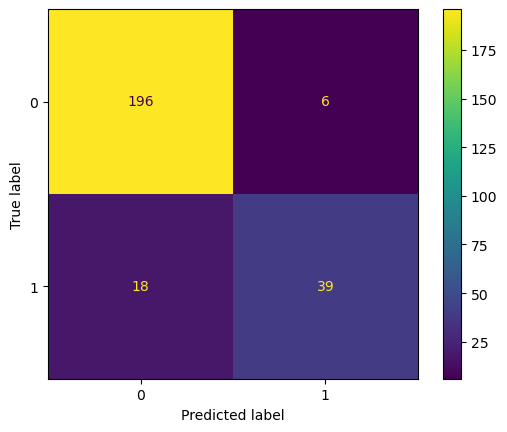

In [232]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

#### Explanation of the new results

`Accuracy:`
* The accuracy decreased from `93.38%` to `90.73%`

##### I think it decreased because:
`Learning Rate:`
* The learning rate is increased to `0.01` (it was `0.001`)
* A `higher learning rate` can lead to `faster training/convergence`, but it also risks missing the optimal minima in the loss landscape, leading to a slightly less optimized model.
* The original model used a `smaller learning rate`, it might have allowed more precise convergence, resulting in higher accuracy.

`Model Complexity:`
* The original model used `4` hidden layers with `varying` units, allowing it to learn a more complex representation of the data.
* While the tuned model reduced the number of hidden layers to `3` and set the number of neurons per layer to `32`, which is a simpler architecture compared to the original.
* This simplification can limit the model’s capacity to capture all the nuances in the data, slightly reducing accuracy.

# Feature Importance

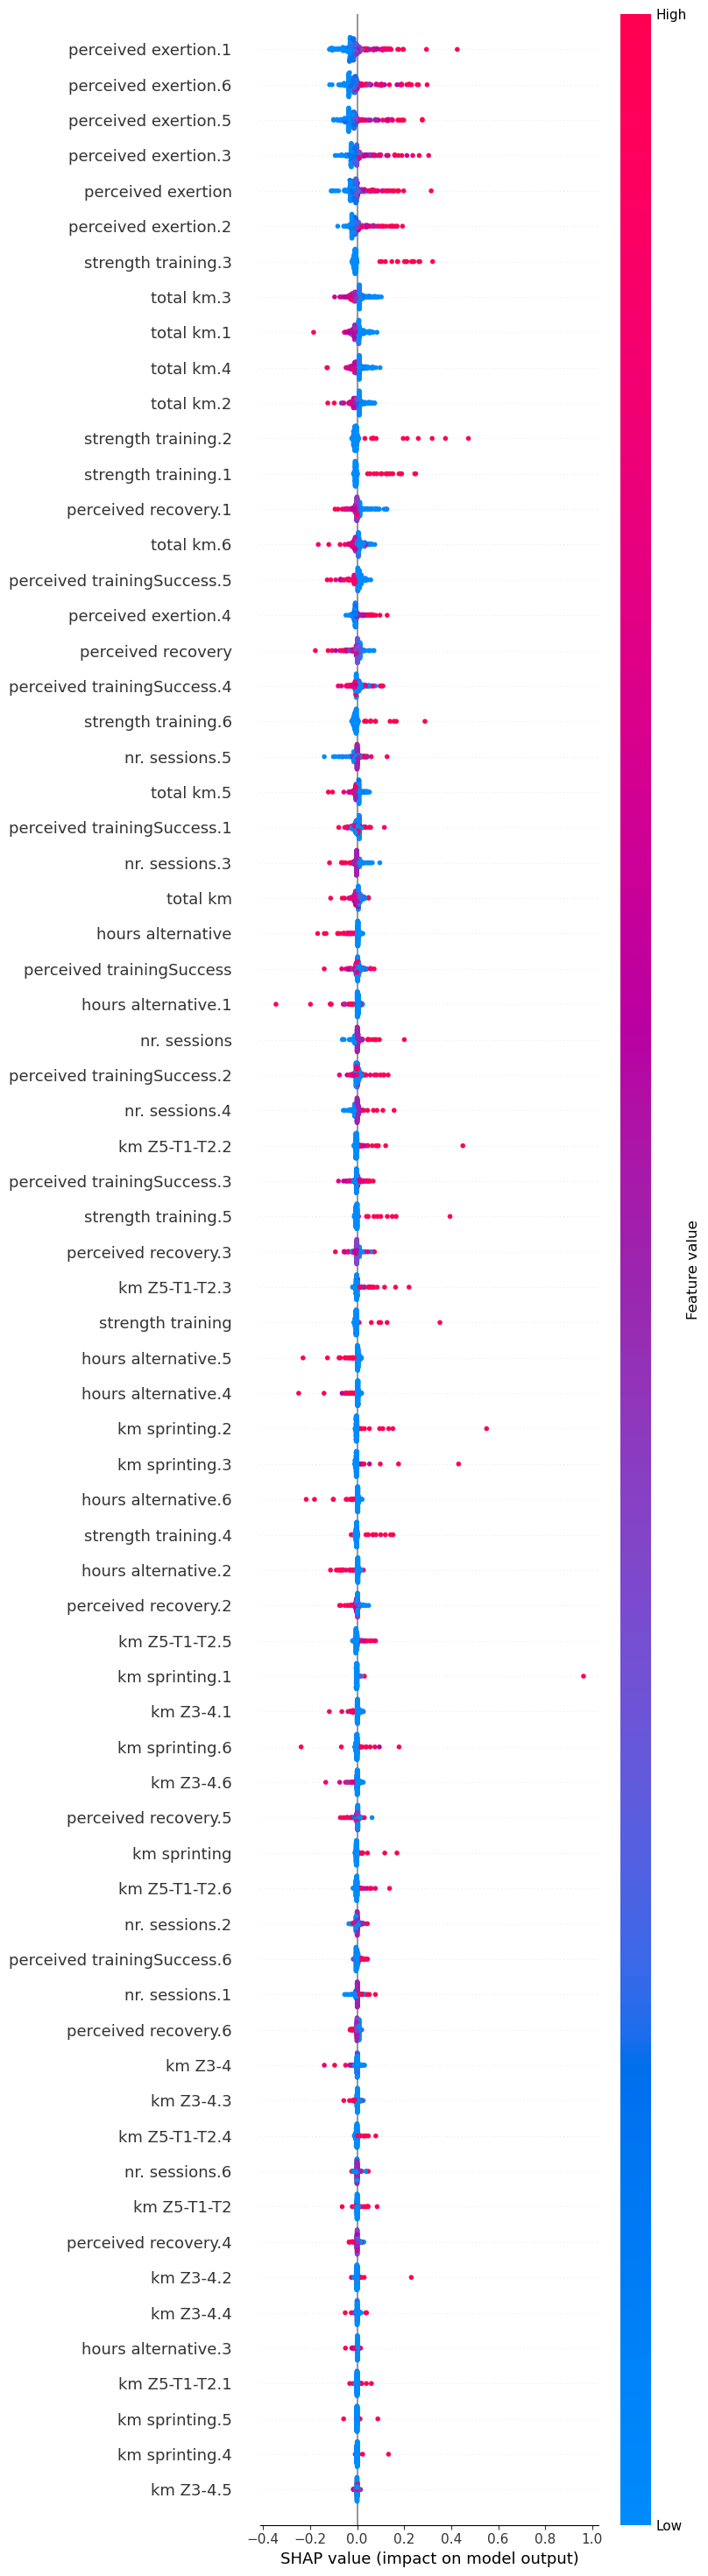

In [208]:
# Prepare a small subset of the dataset for SHAP
background = X_train
test_sample = X_test

explainer = shap.DeepExplainer(model=model, data=background)
shap_values = explainer.shap_values(test_sample)

shap.summary_plot(np.squeeze(shap_values, -1),
                  features=test_sample, 
                  feature_names=X.columns, 
                  max_display=70);